| 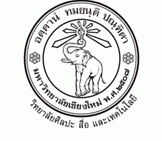 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          |        <em><font size=5>Department of Modern Management and <br> Information Technology </font></em><br>  <font size=3>College of Arts, Media and Technology,<br> Chiang Mai University<br></font> Midterm Examination, Academic Year 2021 <br> Business Data Mining 954471
|:- |-: 
|<strong>October 18th, 2021 8:00 - 23:59 </strong>| <strong>(Total 35 Points) </strong>

<b>Name__Apigorn_Pornrattanapitak______________________________________________________________      Student ID__622110240_____________________________________________</b>

Instructions: 

-	This exam is worth 35% of your final grade.
-	This exam consists of 5 Questions
-	Finish this exam, download it as .ipynb file and send it to my FB messenger.
-	Write your student ID as filename. 
-	Allow anything.
-	<b>Please do this exam alone and be honest to yourself. </b>
-	The time allowed students to leave the testing room after the exam is open to copy it.
-	Students who cheat in any way will be prosecuted by the CMU regulation BE 2554, which governs student behavior and describes discipline during the exam period. The proctor must report any suspected cheating to the director.
<br>

### <em>Score Sheet:</em>
|<font size=3> Question|<font size=3> Full Mark|<font size=3> Student’s Mark|
|:- |:-:|:-:
<font size=3> Q1 |<font size=3> 5|
<font size=3> Q2 |<font size=3> 5|
<font size=3> Q3 |<font size=3> 5|
<font size=3> Q4 |<font size=3> 10|
<font size=3> Q5 |<font size=3> 10|
<font size=3> Total|<font size=3> 35|








In [1]:
import numpy as np
import pandas as pd

#### Q1. Create Model to predict the Telco customer churn (Churn = Label).
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [22]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [24]:
df = df.set_index('customerID')
df_clean = df.drop(['gender'],axis = 1)
df_clean

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [25]:
df_clean.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
df_clean['Partner'] = pd.factorize(df_clean['Partner'])[0]
df_clean['Dependents'] = pd.factorize(df_clean['Dependents'])[0]
df_clean['PhoneService'] = pd.factorize(df_clean['PhoneService'])[0]
df_clean['MultipleLines'] = pd.factorize(df_clean['MultipleLines'])[0]
df_clean['InternetService'] = pd.factorize(df_clean['InternetService'])[0]
df_clean['OnlineSecurity'] = pd.factorize(df_clean['OnlineSecurity'])[0]
df_clean['OnlineBackup'] = pd.factorize(df_clean['OnlineBackup'])[0]
df_clean['DeviceProtection'] = pd.factorize(df_clean['DeviceProtection'])[0]
df_clean['TechSupport'] = pd.factorize(df_clean['TechSupport'])[0]
df_clean['StreamingTV'] = pd.factorize(df_clean['StreamingTV'])[0]
df_clean['StreamingMovies'] = pd.factorize(df_clean['StreamingMovies'])[0]
df_clean['Contract'] = pd.factorize(df_clean['Contract'])[0]
df_clean['PaperlessBilling'] = pd.factorize(df_clean['PaperlessBilling'])[0]
df_clean['PaymentMethod'] = pd.factorize(df_clean['PaymentMethod'])[0]
df_clean['TotalCharges'] = pd.factorize(df_clean['TotalCharges'])[0]
df_clean['Churn'] = pd.factorize(df_clean['Churn'])[0]

In [27]:
df_clean.dtypes

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [28]:
y = df_clean['Churn']
X = df_clean.drop(['Churn'],axis = 1)
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0
5575-GNVDE,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1
3668-QPYBK,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,2
7795-CFOCW,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,3
9237-HQITU,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,6526
2234-XADUH,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,6527
4801-JZAZL,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,6528


In [29]:
y.unique()

array([0, 1])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 2, 4, 8, 16]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 2}
10CV accuracy : 80.36881322197446


In [33]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 79.63094393186657


#### Q2. Create Model to predict the spam mail utilizing feature selection method. (Column 0 = Label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [34]:
df = pd.read_csv("../input/plenoi-mail/MAIL.csv", header = None)
df_test = pd.read_csv("../input/plenoi-mail/MAIL_test.csv", header = None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.0,-1.000000,-0.792705,-1.000000,-1.000000,-1.000000,-0.421965,-1.00000,-1.000000,...,-1.0,-1.0,-0.088486,-1.000000,-0.903030,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,0,-1.0,-0.941068,-0.735823,-0.791284,-0.833604,-0.882136,-1.000000,-0.73849,-0.865562,...,-1.0,-1.0,-0.859439,-0.970093,-0.970093,-0.574766,-0.715888,-0.891589,-0.837383,-1.0
2,0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.703353,-1.000000,-0.936884,-0.461539,-0.850098,-0.771204,-1.000000,-1.0
3,0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.729497,-0.884892,-0.769784,-1.000000,-0.453238,-0.582735,-1.000000,-1.0
4,0,-1.0,-1.000000,-0.728317,-1.000000,-0.315508,-0.515152,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.090325,-1.000000,-0.741936,-1.000000,0.225804,-1.000000,-1.000000,-1.0


In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,0,-1.000000,-1.000000,-1.000000,-1.0,-0.826910,-0.632182,-1.000000,-1.000000,-0.720307,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,0,-1.000000,-0.840000,-0.820690,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.635001,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,0,-1.000000,-1.000000,-0.886152,-1.0,-1.000000,-0.796825,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,0,-1.000000,-1.000000,-0.774452,-1.0,-1.000000,-0.798742,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,1,-1.000000,-1.000000,-0.825912,-1.0,-0.780697,-1.000000,-0.514563,-0.310679,-1.000000,...,-1.0,-1.0,-0.810101,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3583,1,-0.718147,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.400795,-1.000000,-0.872510,-0.818725,-1.000000,-1.000000,-0.306773,-1.0
3584,1,-1.000000,-0.854546,-1.000000,-1.0,0.026740,-0.854546,-1.000000,-1.000000,-0.668183,...,-1.0,-1.0,-0.645283,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.589623,-1.0
3585,1,-1.000000,-0.706422,-1.000000,-1.0,-1.000000,-0.706422,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,-0.841584,-0.549505,-0.247525,-1.000000,-1.000000,-1.0


In [36]:
df.isnull().any()

0      False
1      False
2      False
3      False
4      False
       ...  
396    False
397    False
398    False
399    False
400    False
Length: 401, dtype: bool

In [37]:
y = df[0]
X = df.drop([0],axis = 1)
X

,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,-1.000000,-1.000000,-1.000000,-1.0,-0.826910,-0.632182,-1.000000,-1.000000,-0.720307,-1.000000,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,-1.000000,-0.840000,-0.820690,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.635001,-1.000000,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,-1.000000,-1.000000,-0.886152,-1.0,-1.000000,-0.796825,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,-1.000000,-1.000000,-0.774452,-1.0,-1.000000,-0.798742,-1.000000,-1.000000,-1.000000,-0.308175,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,-1.000000,-1.000000,-0.825912,-1.0,-0.780697,-1.000000,-0.514563,-0.310679,-1.000000,-0.466019,...,-1.0,-1.0,-0.810101,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3583,-0.718147,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.400795,-1.000000,-0.872510,-0.818725,-1.000000,-1.000000,-0.306773,-1.0
3584,-1.000000,-0.854546,-1.000000,-1.0,0.026740,-0.854546,-1.000000,-1.000000,-0.668183,-1.000000,...,-1.0,-1.0,-0.645283,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.589623,-1.0
3585,-1.000000,-0.706422,-1.000000,-1.0,-1.000000,-0.706422,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,-0.841584,-0.549505,-0.247525,-1.000000,-1.000000,-1.0


In [38]:
y.unique()

array([0, 1])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaler.fit(X_train) 
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

clf = Pipeline([
  ('scaler', scaler), 
  ('feature_selection', SelectKBest(f_classif)),
  ('classification', LogisticRegression(random_state=0))
])

In [41]:
params = {
    'feature_selection__k' : [3,5,7],
    'classification__C' : [1, 2, 4, 8, 16]
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        LogisticRegression(random_state=0))]),
             param_grid={'classification__C': [1, 2, 4, 8, 16],
                         'feature_selection__k': [3, 5, 7]})

In [42]:
print("Training Accuracy : "+str(best_clf.best_score_))

Training Accuracy : 0.7204588094831997


In [43]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.7075208913649025


#### Q3. Create Deep Learning Model to predict the quality of wine. Our model will focus only on wine with quality of 5, 6, 7 (quality = label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [44]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
df.groupby("quality")["quality"].count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [46]:
df_sel = df[(df['quality']==5) | (df['quality']==6) | (df['quality']==7)]
df_sel.shape

(1518, 12)

In [47]:
Xo = df_sel.drop(['quality'],axis=1).values
yo = df_sel['quality'].values

In [48]:
np.unique(yo)

array([5, 6, 7])

In [49]:
yo[yo==5] = 0
yo[yo==6] = 1
yo[yo==7] = 2
np.unique(yo)

array([0, 1, 2])

In [50]:
[sum(yo == item) for item in np.unique(yo)]

[681, 638, 199]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y, yt = train_test_split(Xo, yo, test_size=0.2, random_state=0)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val, y, yv = train_test_split(X_train, y, test_size=0.2, random_state=0)

In [53]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=0)
#X_res, y_res = sm.fit_resample(X_train, y)

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_train)
X_train_norm = scl.transform(X_train)
X_val_norm = scl.transform(X_val)
X_test_norm = scl.transform(X_test)

In [54]:
num_label = len(np.unique(y)) 
y_multi = (np.arange(num_label) == y[:,None]).astype(np.float32)
yv_multi = (np.arange(num_label) == yv[:,None]).astype(np.float32)
yt_multi = (np.arange(num_label) == yt[:,None]).astype(np.float32)

In [55]:
sample_size, input_size = X_train_norm.shape

In [56]:
import tensorflow as tf
def create_model(input_size, num_label):
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph()
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, activation='relu', input_shape=(input_size,)),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

In [57]:
model = create_model(input_size, num_label)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_acc = list()
val_acc = list()
for i in range(0,350):
  history = model.fit(X_train_norm, y_multi, epochs= 2, batch_size = int(sample_size/4), validation_data= (X_val_norm, yv_multi))
  tmp_avg = np.mean(history.history['loss'])
  tmp_avg_val = np.mean(history.history['val_loss'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

Epoch 1/2
5/5 [==============================] - 1s 72ms/step - loss: 1.0986 - accuracy: 0.3728 - val_loss: 1.0934 - val_accuracy: 0.4897
Epoch 2/2
5/5 [==============================] - 0s 15ms/step - loss: 1.0925 - accuracy: 0.4708 - val_loss: 1.0889 - val_accuracy: 0.5309
Epoch 1/2
5/5 [==============================] - 0s 28ms/step - loss: 1.0884 - accuracy: 0.5160 - val_loss: 1.0855 - val_accuracy: 0.5350
Epoch 2/2
5/5 [==============================] - 0s 15ms/step - loss: 1.0860 - accuracy: 0.5191 - val_loss: 1.0818 - val_accuracy: 0.5514
Epoch 1/2
5/5 [==============================] - 0s 27ms/step - loss: 1.0832 - accuracy: 0.5139 - val_loss: 1.0774 - val_accuracy: 0.5514
Epoch 2/2
5/5 [==============================] - 0s 14ms/step - loss: 1.0782 - accuracy: 0.5149 - val_loss: 1.0723 - val_accuracy: 0.5885
Epoch 1/2
5/5 [==============================] - 0s 28ms/step - loss: 1.0733 - accuracy: 0.5366 - val_loss: 1.0677 - val_accuracy: 0.6049
Epoch 2/2
5/5 [===================

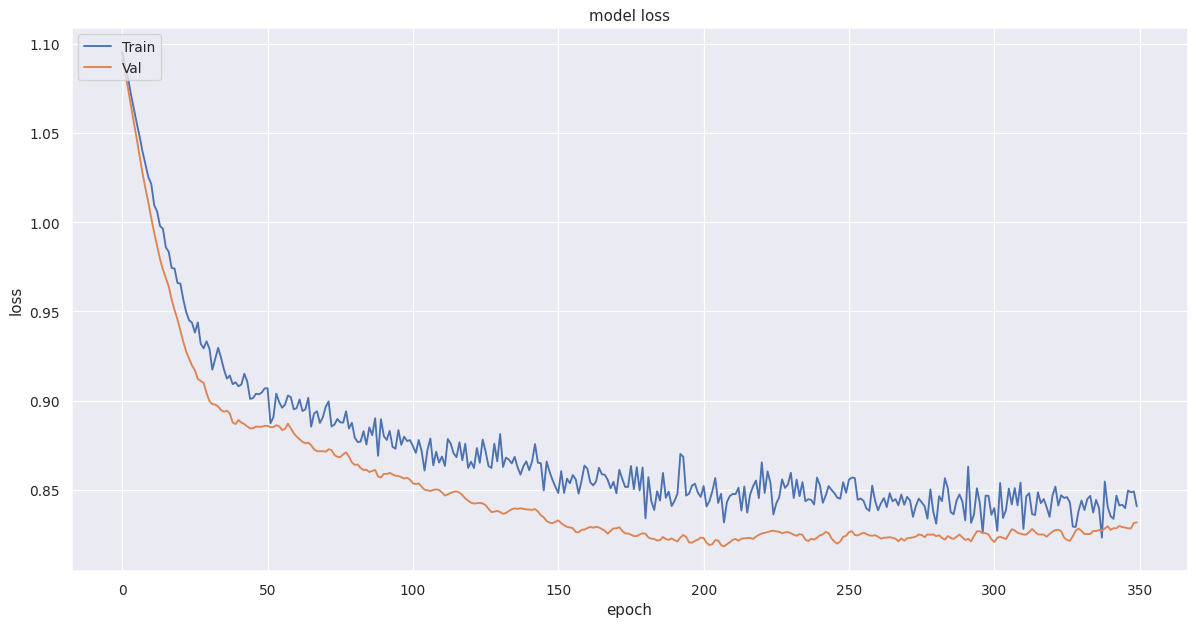

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [59]:
yp = model.predict(X_train_norm)
yp = np.argmax(yp, 1)
sum(yp == y)/len(y)

0.6189495365602472

In [60]:
yp = model.predict(X_test_norm)
yp = np.argmax(yp, 1)
sum(yp == yt)/len(yt)

0.5723684210526315

#### Q4. From this food images ("../input/food41/images"), please create an image classifier to classify 2 types of food choosing by yourself. (Show me the accuracy of each type of food) 
<b><font color=red>Both types of food must be more than 50% to get full score.</font></b>

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/food41/images/caesar_salad'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/food41/images/cup_cakes'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/food41/images/caesar_salad/810822.jpg
/kaggle/input/food41/images/caesar_salad/1485495.jpg
/kaggle/input/food41/images/caesar_salad/2874677.jpg
/kaggle/input/food41/images/caesar_salad/1617779.jpg
/kaggle/input/food41/images/caesar_salad/1973032.jpg
/kaggle/input/food41/images/caesar_salad/2909626.jpg
/kaggle/input/food41/images/caesar_salad/2263243.jpg
/kaggle/input/food41/images/caesar_salad/1694973.jpg
/kaggle/input/food41/images/caesar_salad/1995850.jpg
/kaggle/input/food41/images/caesar_salad/1311466.jpg
/kaggle/input/food41/images/caesar_salad/2322354.jpg
/kaggle/input/food41/images/caesar_salad/2141685.jpg
/kaggle/input/food41/images/caesar_salad/3292549.jpg
/kaggle/input/food41/images/caesar_salad/2707518.jpg
/kaggle/input/food41/images/caesar_salad/1260222.jpg
/kaggle/input/food41/images/caesar_salad/199749.jpg
/kaggle/input/food41/images/caesar_salad/2832930.jpg
/kaggle/input/food41/images/caesar_salad/211944.jpg
/kaggle/input/food41/images/caesar_salad/849754.j

In [3]:
!rm -rf train
!rm -rf test

In [4]:
import glob
caesar_salad = glob.glob("../input/food41/images/caesar_salad/*.*")
cup_cakes = glob.glob("../input/food41/images/cup_cakes/*.*")

In [5]:
!mkdir train
!mkdir train/caesar_salad
!mkdir train/cup_cakes

In [6]:
import shutil
for i in range(len(caesar_salad)):
        shutil.copy(caesar_salad[i], '/kaggle/working/train/caesar_salad/')
for i in range(len(cup_cakes)):
        shutil.copy(cup_cakes[i], '/kaggle/working/train/cup_cakes/')

In [7]:
!mkdir test
!mkdir test/caesar_salad
!mkdir test/cup_cakes

In [8]:
import glob
filesalad = glob.glob("./train/caesar_salad/*.*")
filecake = glob.glob("./train/cup_cakes/*.*")

In [9]:
sidx = np.random.randint(len(filesalad), size = 4)
cidx = np.random.randint(len(filecake), size = 2)

In [10]:
for i in sidx:
    shutil.move(filesalad[i],'./test/caesar_salad/')
for i in cidx:
    shutil.move(filecake[i],'./test/cup_cakes/')

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        #rescale = 1.0/255.0,   # Intensity Normalized
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,   # randomly flip images
        validation_split=0.2)

2021-10-18 12:42:50.081836: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [12]:
train_dir = './train'
batch_size = 5
img_height = 100 
img_width  = 100
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1596 images belonging to 2 classes.
Found 398 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'caesar_salad': 0, 'cup_cakes': 1}

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
# preparing the layers in the Convolutional Deep Neural Network
def create_model():
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = train_generator.image_shape))
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [15]:
model = create_model()
fitted_model = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 40)

2021-10-18 12:45:00.745207: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-18 12:45:00.749912: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-18 12:45:00.808086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 12:45:00.809211: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-18 12:45:00.809268: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-18 12:45:00.849700: I tensorflow/stream_executor/platform/def

Epoch 1/40


2021-10-18 12:45:04.635412: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-18 12:45:05.773021: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-18 12:45:05.822895: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


319/319 [==============================] - 24s 46ms/step - loss: 1.0559 - accuracy: 0.5094 - val_loss: 0.6831 - val_accuracy: 0.5696
Epoch 2/40
319/319 [==============================] - 14s 45ms/step - loss: 0.7118 - accuracy: 0.6141 - val_loss: 0.6419 - val_accuracy: 0.6405
Epoch 3/40
319/319 [==============================] - 14s 44ms/step - loss: 0.6013 - accuracy: 0.6890 - val_loss: 0.6737 - val_accuracy: 0.6709
Epoch 4/40
319/319 [==============================] - 15s 46ms/step - loss: 0.5886 - accuracy: 0.6896 - val_loss: 0.5936 - val_accuracy: 0.6962
Epoch 5/40
319/319 [==============================] - 14s 43ms/step - loss: 0.5914 - accuracy: 0.7013 - val_loss: 0.5686 - val_accuracy: 0.7291
Epoch 6/40
319/319 [==============================] - 15s 47ms/step - loss: 0.6004 - accuracy: 0.7519 - val_loss: 0.6177 - val_accuracy: 0.6658
Epoch 7/40
319/319 [==============================] - 14s 42ms/step - loss: 0.5780 - accuracy: 0.7025 - val_loss: 0.5592 - val_accuracy: 0.7266
Epo

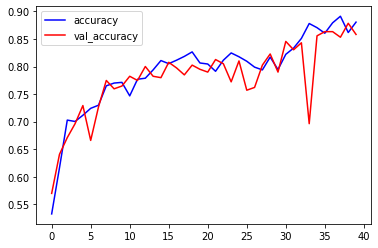

In [16]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b-', label = 'accuracy')
plt.plot(range(len(val_accuracy)), val_accuracy, 'r-', label = 'val_accuracy')
plt.legend()

In [17]:
import glob
filesalad = glob.glob("./test/caesar_salad/*.*")
filecake = glob.glob("./test/cup_cakes/*.*")

In [20]:
from tensorflow.keras.preprocessing import image
# testing the model
plabel = []
for filename in filesalad:
    test_image = image.load_img(filename, target_size = (img_height, img_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    plabel.append(np.round(model.predict(test_image)[0][0]))
plabel = np.array(plabel)
sum(plabel==0)/len(plabel)

1.0

In [21]:
plabel = []
for filename in filecake:
    test_image = image.load_img(filename, target_size = (img_height, img_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    plabel.append(np.round(model.predict(test_image)[0][0]))
plabel = np.array(plabel)
sum(plabel==1)/len(plabel)

1.0